<a id='start'></a>
# Classificazione

In questo notebook viene spiegato cosa sono e come possiamo realizzare dei compiti di Classificazione con Python. <br>
<br>
Il notebook è suddiviso nelle seguenti sezioni:<br>
- [Decision Trees](#section1-0)
    - [Definizione](#section1-1)
    - [Esempio](#section1-2)
    - [Lavoriamo con Python](#section1-3)
    - [I boosted decision trees](#section1-4)
    - [Random forest](#section1-5)
- [Classificazione](#section2)
    - [Lavoriamo con Python](#section3)
    - [Classificazione con due features](#section4)
    - [Classificazione con tutte le feature](#section5)
    - [Un esempio fisico](#section6) <br>

<a id='section1-1'></a>
## Definizione

I Decision Tree sono dei classificatori che utilizzano il ML supervisionato e che con meccanismi probabilistici offorono supporto nei problemi di decisione. 

Come ogni altro classificatore, i DT sono in grado di predirre un etichetta per un set di dati di esempio. I DT realizzano questo compito esaminando i risultati probabilistici delle caratteristiche dei dati di esempio.


I Decision Tree hanno alcune caratteristiche che li rendono unici:
- Il decision tree è strutturato come un diagramma a flowchart. Ha un solo nodo radice da cui parte la valutazione e può contenere uno o più nodi foglie e diversi nodi interni;
- Ogni nodo del decision tree rappresenta il test di una singola feature dei dati in ingresso. Per esempio, si può verificare se una feature chiamata *age* sia o meno maggiore di 18;
- Ogni bivio nel decision tree connette due nodi, un nodo originario e uno di destinazione. Un bivio rappresenta un risultato del test effettuato sul nodo padre. Nel nostro esempio, se stiamo testando *age > 18*, possiamo avere due possibili bivi: True e False. Ognuno di questi due bivi connetterà il nodo che descrive il test *age > 18 node* con altri due nodi di destinazione.
- Ogni nodo foglia dell'albero di decisione rappresenta una classificazione. L'obiettivo dell'albero è quello di dare un'etichetta ai dati di input e quindi ogni foglia rappresenta l'etichetta assegnata al dato passato nell'albero di decisione.

<a id='section1-2'></a>
## Esempio

Un insegnante ritiene che ci debba essere una relazione tra il livello di salute dei suoi studenti, il numero di ore di studio e i voti finali. <br>
Per decidere la correlazione, chiede a 75 dei suoi studenti quante ore a
settimana passano a studiare. Sembra ragionevole iniziare con questa domanda, in quanto dovrebbe avere il maggior impatto sui loro voti. <br>

<img src='img/histogram.jpg'> <br>

Fantastico! L'insegnante nota che il 100% degli studenti in difficoltà studia meno di 2,5 ore settimanali. Altrettanto interessante è notare che tra gli studenti che passano il corso, alcuni di loro studiano molto, altri ancora studiano solo a un livello medio. Per classificare correttamente questi studenti, sono sicuramente necessari più dati.

Essendo curioso, l'insegnante chiede agli studenti un'altra domanda: quanto sono attenti alla loro salute, in special modo relativamente al cibo che mangiano, su una scala da 1 a 5? Preferiscono del junk food (1) o mangiare una salutare mela (5)? <br>

<img src="img/decision_tree.jpg"> <br>

Gli studenti iniziano a rispondere e qualcosa attira l'attenzione dell'insegnante. Con una sola eccezione, ogni singolo studente che non prende sul serio le proprie abitudini alimentari e di salute, rispondendo con meno di 3,3 al sondaggio con scala 5, ha voti più bassi.

Come l'insegnante continua a fare domande per scoprire maggiori dettagli sui suoi studenti, noi possiamo classificarli con maggior correttezza. Questo procedimento costruisce alberi decisionali che permettono di tagliare con crescente precisione lo spazio delle caratteristiche delle osservazioni per purificare la classe dei campioni.

Questo è come potrebbe apparire un albero decisionale per l'esempio sopra riportato:

<img src="img/decision_tree_1.jpg"> <br>

Il nodo radice inizia con tutti gli esempi. I valori [25, 25, 25] rappresentano tutti gli studenti dell'insegnante che appartengono a tre classi: scansafatiche, medio e secchione, in quest'ordine.

Al primo nodo, c'è un alto livello di impurità.  La funzione considerata dal nodo radice è il numero di ore trascorse a studiare a settimana e la decisione presa è <= 2.45 o superiore.

In questo albero, ogni ramo sinistro rappresenta una risposta True alla domanda decisionale, e ogni ramo destro è una risposta False. Gli studenti che trascorrono <= 2,45 ore alla settimana appartengono tutti alla prima classe, valore = [25, 0, 0] e quindi il ramo ha un'impurezza di 0,0.

Gli studenti che trascorrono più di 2,45 ore a settimana studiando compongono il resto del corpo studentesco. Gli studenti in questo caso si dividono esattamente a metà tra le due classi.

In altre parole, questo ramo ha valori molto mischiati. Una ulteriore classificazione binaria può essere possibile. Ecco perché l'impurità è impostata al 100% qui. Ma testando la funzione di consapevolezza della salute, l'insegnante è in grado di purificare considerevolmente le selezioni risultanti, in modo tale che solo un campione di uno studente sia classificato erroneamente su entrambi i lati.

<a id='section1-3'></a>
## Lavoriamo con Python

In [1]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

Importiamo un dataset sui funghi dove le diverse specie sono classificate tra commesibili, velenose, di commestibilità sconosciuta o non raccomandate.

Informazioni sul dataset possono essere [trovate qui](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.names).

Carichiamo il dataset di funghi in X e verifichiamo di averlo fatto correttamente e di non aver incluso alcuna funzione che chiaramente non dovrebbe far parte del set di dati.

In [2]:
X = pd.read_csv("data/agaricus-lepiota.data", na_values='?')
X.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


I dati non hanno intestazione. Fixiamo questo problema leggendo i riferimenti nel link fornito precedentemente.

In [3]:
X.columns = ['classification', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']
X.head()

,classification,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


Eliminiamo i valori con NA.

In [4]:
print("Old dataset's shape:", X.shape)
X = X.dropna()
print("New dataset's shape:", X.shape)

Old dataset's shape: (8123, 23)
New dataset's shape: (5643, 23)


Copiamo le etichette della classificazione in un'altra variabile `y` e rimuoviamoli dal dataset `X`.

Possiamo quindi encodare le etichette usando la funzione `.map()`.

In [5]:
y = X[['classification']].copy()
x = X.copy()
x = x.drop(['classification'], axis=1)

y.classification = y.classification.map({'e':0, 'p':1})

#get_dummies -> Convert categorical variable into dummy/indicator variables
x = pd.get_dummies(x, columns=['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat'])
x

,cap_shape_b,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_f,cap_surface_g,cap_surface_s,cap_surface_y,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7985,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
8000,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
8037,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
8094,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


Dividiamo i nostri dati in due sottoinsiemi: `test` e `train`. La numerosità di `test` dovrebbe essere circa il 30%.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Creiamo un classificatore DT:

In [7]:
def dct_f(X_train, y_train):
    dct = tree.DecisionTreeClassifier()
    dct.fit(X_train, y_train)
    
    #DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=9, 
    #                       min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
    #                       random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
    #                       class_weight=None, presort=False)
    
    return dct

A questo punto possiamo addestrare il classificatore sui dati training; successivamente possiamo utilizzare il classificatore sull'intero dataset di test:

In [8]:
dct = dct_f(X_train, y_train)
score = dct.score(X_test, y_test)
score_t = dct.score(X_train, y_train)
print("High-Dimensionality Score Train:", score_t)
print("High-Dimensionality Score Test:", score)

High-Dimensionality Score Train: 1.0
High-Dimensionality Score Test: 1.0


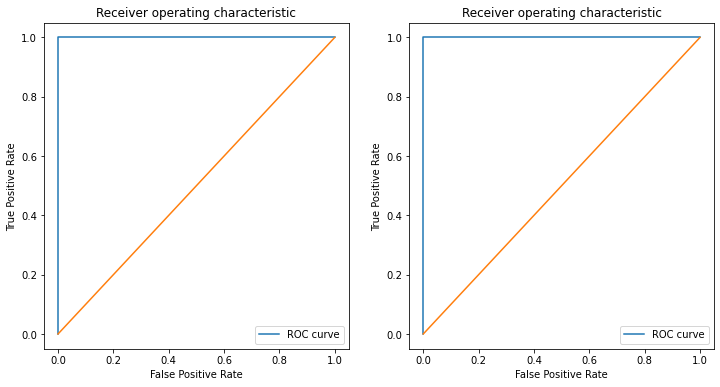

In [9]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import itertools

y_test_hat = dct.predict(X_test)
y_train_hat = dct.predict(X_train)
y_test_proba = dct.predict_proba(X_test)
y_train_proba = dct.predict_proba(X_train)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

fpr, tpr, _ = roc_curve(y_test_hat, y_test_proba[:,1])
roc_auc = auc(fpr, tpr)

ax1.plot(fpr, tpr, label="ROC curve")
ax1.plot([0, 1], [0, 1])
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.set_title("Receiver operating characteristic")
ax1.legend(loc="lower right")

fpr, tpr, _ = roc_curve(y_train, y_train_proba[:,1])
roc_auc = auc(fpr, tpr)

ax2.plot(fpr, tpr, label="ROC curve")
ax2.plot([0, 1], [0, 1])  # classificazione casuale
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
ax2.set_title("Receiver operating characteristic")
ax2.legend(loc="lower right")

plt.show()

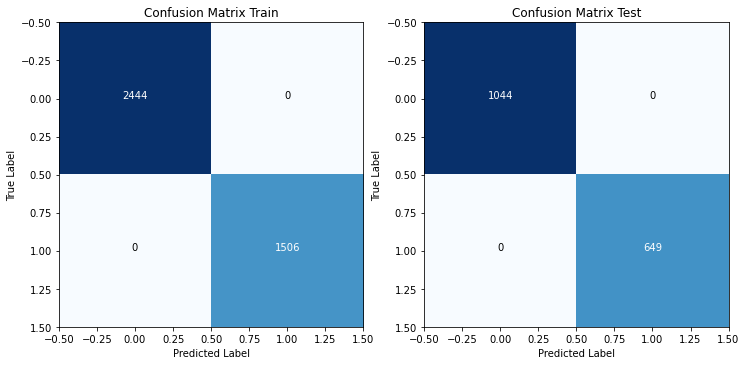

In [10]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import itertools


y_train_hat = dct.predict(X_train)
y_test_hat = dct.predict(X_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

cf = confusion_matrix(y_train, y_train_hat)
ax1.imshow(cf, cmap=plt.cm.Blues)
ax1.set_title("Confusion Matrix Train")
ax1.set_ylabel("True Label")
ax1.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax1.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

cf = confusion_matrix(y_test, y_test_hat)
ax2.imshow(cf, cmap=plt.cm.Blues)
ax2.set_title("Confusion Matrix Test")
ax2.set_ylabel("True Label")
ax2.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax2.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

plt.show()

In [11]:
from sklearn.metrics import roc_auc_score
    
y_train_score = dct.predict_proba(X_train)[:, 1]
y_test_score = dct.predict_proba(X_test)[:, 1]
    
auc_train = roc_auc_score(y_train, y_train_score)
auc_test = roc_auc_score(y_test, y_test_score)

print(f'Training AUC: {auc_train}')
print(f'Testing AUC: {auc_test}')

Training AUC: 1.0
Testing AUC: 1.0


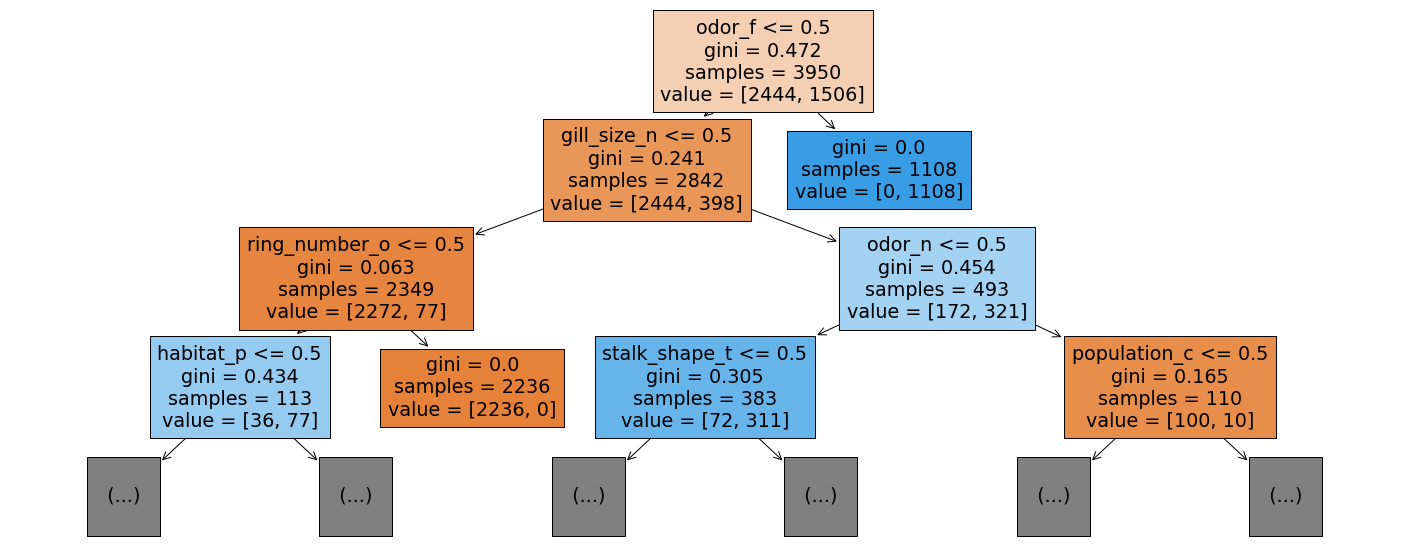

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(dct, 
                   feature_names=x.columns,
                   max_depth=3,
                   filled=True)

D:\Anaconda\envs\env_fisica\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


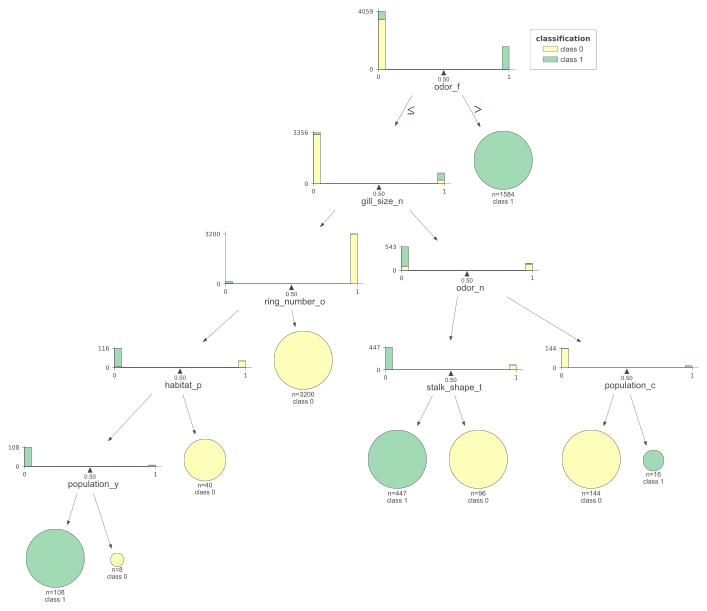

In [14]:
from dtreeviz.trees import dtreeviz
import os
os.environ["PATH"] += os.pathsep + 'D:/Graphviz/bin'
viz = dtreeviz(dct, x, y['classification'],
               target_name='classification',
               feature_names=list(x.columns))

viz

Usiamo shap per vedere come è possibile dare una spiegazione di come opera il modello.

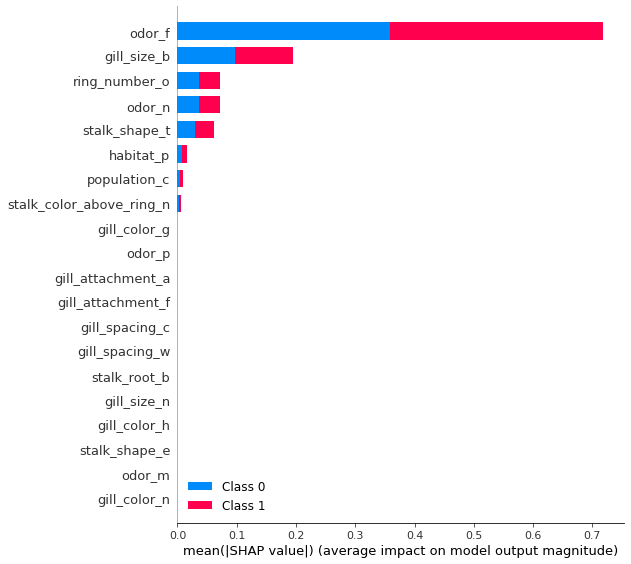

In [14]:
import shap
# quanto è utile la variabile ai fini della classificazione
shap_values = shap.TreeExplainer(dct).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

<a id='section1-3bis'></a>
## Un esempio fisico

Prendiamo i dati dal portale [CERN per gli Open Data](http://opendata.cern.ch/record/10001).

Questo set di dati è stato estratto dal repository di dati ufficiale di OPERA e contiene tutte le informazioni sui dati dell'emulsione per i dieci neutrini tau candidati, identificati dopo un'analisi approfondita che include i dati sia dei rivelatori elettronici che dei film di emulsione nucleare dopo la loro digitalizzazione con microscopi ottici completamente automatizzati. L'osservazione dell'aspetto del neutrino tau in un fascio di neutrini muonici era l'obiettivo principale dell'esperimento OPERA. Questo record di dati contiene in particolare le informazioni sui vertici di interazione dei neutrini comprese tutte le tracce di emulsione prodotte nelle interazioni osservate e nel decadimento. La localizzazione dell'interazione del neutrino e la misurazione delle traiettorie di tutte le particelle prodotte è la fase finale dell'analisi dell'evento, dopo l'identificazione dei mattoni di interazione del neutrino effettuata con i dati del rivelatore elettronico. Le tracce ricostruite includono adroni, frammenti nucleari che si muovono sia in avanti che all'indietro e coppie di elettroni, muoni e leptoni tau.

Per questo campione di dati del neutrino tau, la Collaborazione ha eseguito un'analisi dedicata, con una classificazione dettagliata di tutte le particelle prodotte all'interazione del neutrino. Infatti, in un'interazione del neutrino con i nucleoni del bersaglio di piombo, si producono diversi adroni: i cosiddetti adroni doccia e frammenti nucleari prodotti nella rottura e nell'evaporazione del nucleo bersaglio. Inoltre, a seconda del sapore del neutrino interagente, viene prodotto un leptone corrispondente. Dopo una lunghezza di volo di circa 1 mm, il leptone tau prodotto nell'interazione dei neutrini tau decade in uno dei seguenti canali: adrone singolo (49,5%), elettrone (17,8%), muone (17,7%) e tre adroni (15,0 %).

In [15]:
dataset = pd.read_csv("data/lines.csv")
dataset

,trType,posX1,posY1,posZ1,posX2,posY2,posZ2
0,8,112653.0,79333.3,24057.0,112640.0,79344.7,24196.4
1,2,112653.0,79333.3,24057.0,111168.0,78975.8,25883.7
2,2,111168.0,78975.8,25883.7,109962.0,78663.4,27396.4
3,2,109962.0,78663.4,27396.4,108911.0,78360.4,28694.1
4,2,108911.0,78360.4,28694.1,107877.0,78065.5,29980.8
...,...,...,...,...,...,...,...
1030,3,91743.2,40083.6,52238.9,91626.9,40196.8,53600.4
1031,3,91918.8,40006.3,49590.0,91830.4,40034.0,50890.0
1032,3,91830.4,40034.0,50890.0,91776.8,40081.3,52238.9
1033,3,91776.8,40081.3,52238.9,91813.2,40200.6,53600.4


In [16]:
dataset[['trType']].value_counts()

trType
2         719
3         303
8          10
1           3
dtype: int64

In [17]:
filtered = dataset[(dataset['trType'] == 2) | (dataset['trType'] == 3)]
X = filtered[['posX1', 'posY1', 'posZ1', 'posX2', 'posY2', 'posZ2']].values
y = filtered['trType'].values.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

dct = tree.DecisionTreeClassifier()
dct.fit(X_train, y_train)

y_pred = dct.predict(X_test)
y_pred_proba = dct.predict_proba(X_test)

print("ACCURACY: " + str(accuracy_score(y_test, y_pred)))
print("LOG LOSS: " + str(log_loss(y_test, y_pred_proba)))

ACCURACY: 0.9837133550488599
LOG LOSS: 0.5625207881907287


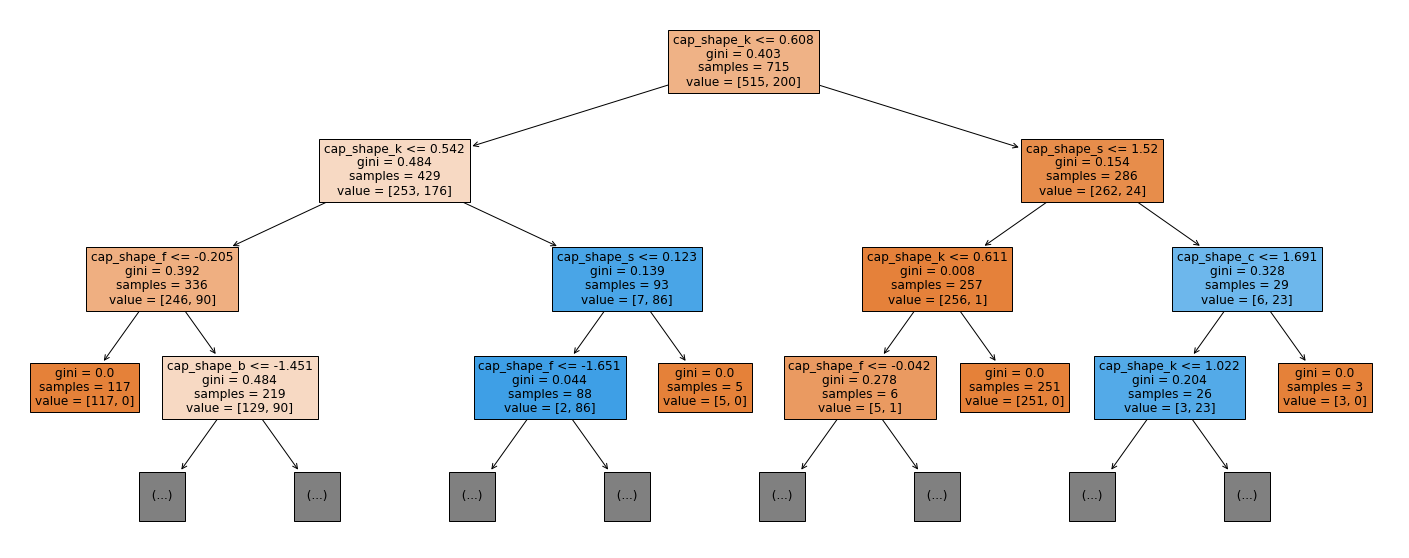

In [18]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(dct, 
                   feature_names=x.columns,
                   max_depth=3,
                   filled=True)

plt.show()

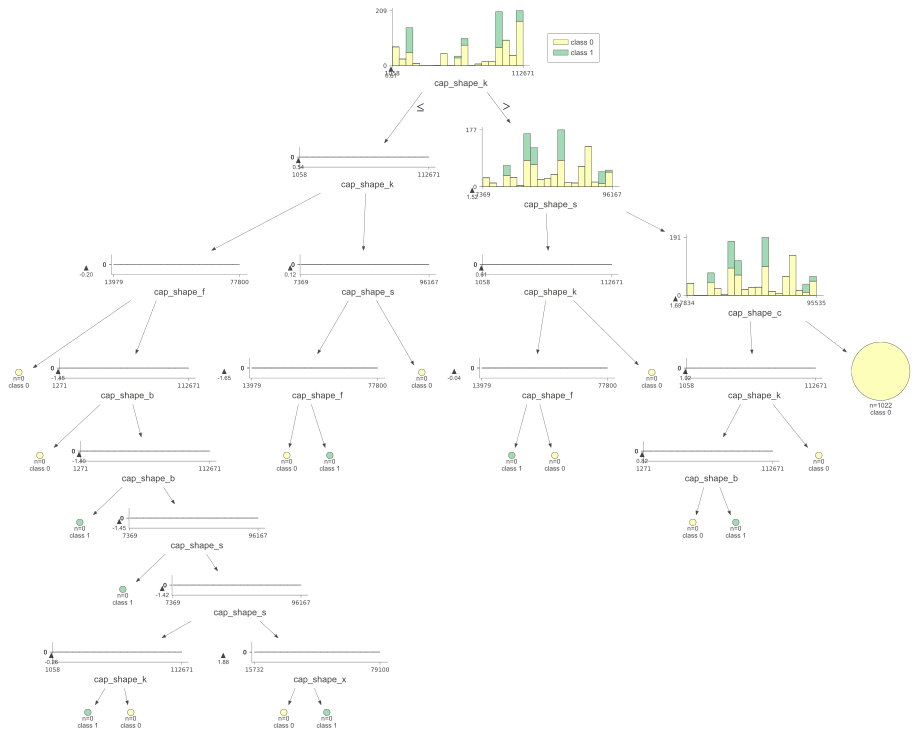

In [19]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(dct, X, y, feature_names=list(x.columns))
viz

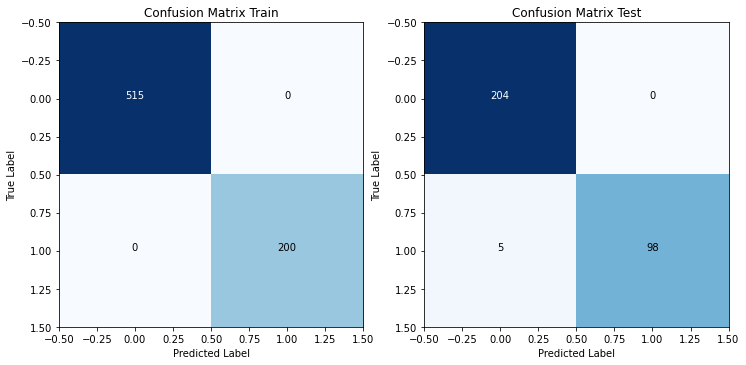

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

y_train_hat = dct.predict(X_train)
y_test_hat = dct.predict(X_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

cf = confusion_matrix(y_train, y_train_hat)
ax1.imshow(cf, cmap=plt.cm.Blues)
ax1.set_title("Confusion Matrix Train")
ax1.set_ylabel("True Label")
ax1.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax1.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

cf = confusion_matrix(y_test, y_test_hat)
ax2.imshow(cf, cmap=plt.cm.Blues)
ax2.set_title("Confusion Matrix Test")
ax2.set_ylabel("True Label")
ax2.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax2.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

plt.show()

In [21]:
values = ss.transform(dataset[['posX1', 'posY1', 'posZ1', 'posX2', 'posY2', 'posZ2']].values)
predicts = dct.predict(values)

dataset['prediction'] = predicts

good = len(dataset[dataset['trType'] == dataset['prediction']])
wrong = len(dataset[dataset['trType'] != dataset['prediction']])

print(f'Events predicted correctly = {good}.')
print(f'Events predicted wrongly = {wrong}.')

print(f'Percent of right classifications = {good / (good+wrong)}.')

Events predicted correctly = 1017.
Events predicted wrongly = 18.
Percent of right classifications = 0.9826086956521739.


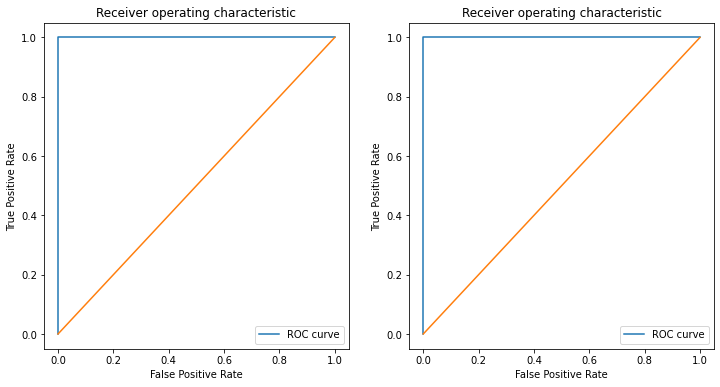

In [22]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import itertools

y_test_hat = dct.predict(X_test)
y_train_hat = dct.predict(X_train)
y_test_proba = dct.predict_proba(X_test)
y_train_proba = dct.predict_proba(X_train)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
fpr, tpr, _ = roc_curve(y_train_hat, y_train_proba[:,1], pos_label=3)
roc_auc = auc(fpr, tpr)

ax1.plot(fpr, tpr, label="ROC curve")
ax1.plot([0, 1], [0, 1])
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.set_title("Receiver operating characteristic")
ax1.legend(loc="lower right")
    
fpr, tpr, _ = roc_curve(y_test_hat, y_test_proba[:,1], pos_label=3)
roc_auc = auc(fpr, tpr)

ax2.plot(fpr, tpr, label="ROC curve")
ax2.plot([0, 1], [0, 1])
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
ax2.set_title("Receiver operating characteristic")
ax2.legend(loc="lower right")

plt.show()

<a id='section1-4'></a>
## I boosted decision trees

Come visto i decision tree prendono un insieme di feature e le utilizzano per suddividere i dati in input in modo ricorsivo sulla base dei valori che queste feature hanno.

I boosted decision trees sono una modalità di **decision trees learning**, ovvero di apprendiamento utilizzando i decision tree, che utilizza un albero decisionale (come modello predittivo) per passare dalle osservazioni su un oggetto (rappresentato nei rami) alle conclusioni sul valore obiettivo dell'articolo (rappresentato nelle foglie).

I modelli ad albero in cui la variabile target può assumere un insieme discreto di valori sono chiamati **alberi di classificazione**; in queste strutture ad albero, le foglie rappresentano le etichette delle classi e i rami rappresentano le congiunzioni delle caratteristiche che portano a quelle etichette delle classi.

Gli alberi decisionali in cui la variabile target può assumere valori continui (in genere numeri reali) sono chiamati **alberi di regressione**.


La metodologia di boosting permette di combinare diversi alberi (che sono __weak learners__) in modo da ottere un classificatore forte. Solitamente il processo che si segue è questo:
- ogni albero è creato iterativamente
- all'autoput di un albero è assegnato un peso relativo alla sua accuratezza
- l'output del classificatore è la somma pesata di tutti i risultati dei vari alberi
- dopo ogni iterazione, i dati in input ricevono un peso basato sulla loro misclassificaizone (più spesso un dato viene classificato in modo erreto, più importante diventa)
- si definisce quindi una funzione di ottimizzazione che si mira a minimizzare.

Per mostrare questa metodologia utilizziamo le API python per la libreria XGBoost (eXtreme Gradient Boosting) con pip.

I dati che utilizzeremo in questo esempio sono ricavati da una competizione fatta da [Atlas](https://home.cern/about/experiments/atlas) su [Kaggle](https://www.kaggle.com/). La competizione aveva lo scopo di identificare gli venti __Higgs to tau tau__.

Ecco il link alla sfida: [the Higgs Boson Machine Learning Challenge](https://www.kaggle.com/c/higgs-boson/data) dove potete trovare i dati di 250,000 eventi simulati di Atlas etichettati ed esportati in formato CSV secondo la specifica descritta [qui](https://www.kaggle.com/c/higgs-boson/data) e [qui](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf).

Potete procedere a scaricare l'interno dataset, in questo notebook useremo un sotto insieme (di circa 10.000 eventi).

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

D:\Anaconda\envs\env_fisica\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [24]:
data = pd.read_csv('data/training_10k.csv')

print('Size of data: {}'.format(data.shape))
print('Number of events: {}'.format(data.shape[0]))
print('Number of columns: {}'.format(data.shape[1]))

print ('\nList of features in dataset:')
for col in data.columns:
    print(col)

Size of data: (10000, 33)
Number of events: 10000
Number of columns: 33

List of features in dataset:
EventId
DER_mass_MMC
DER_mass_transverse_met_lep
DER_mass_vis
DER_pt_h
DER_deltaeta_jet_jet
DER_mass_jet_jet
DER_prodeta_jet_jet
DER_deltar_tau_lep
DER_pt_tot
DER_sum_pt
DER_pt_ratio_lep_tau
DER_met_phi_centrality
DER_lep_eta_centrality
PRI_tau_pt
PRI_tau_eta
PRI_tau_phi
PRI_lep_pt
PRI_lep_eta
PRI_lep_phi
PRI_met
PRI_met_phi
PRI_met_sumet
PRI_jet_num
PRI_jet_leading_pt
PRI_jet_leading_eta
PRI_jet_leading_phi
PRI_jet_subleading_pt
PRI_jet_subleading_eta
PRI_jet_subleading_phi
PRI_jet_all_pt
Weight
Label


Il set di dati ha 10.000 eventi con 33 colonne ciascuno. Sembra che la prima colonna sia un identificatore e non dovrebbe essere utilizzata come funzionalità. Le ultime due colonne "Peso" ed "Etichetta", sono i pesi e le etichette della simulazione, e inoltre non dovrebbero essere utilizzate come caratteristiche (queste informazioni sono tutte contenute nella documentazione).

Ora possiamo vedere quanti eventi sono segnale e sfondo:

In [25]:
# look at column labels --- notice last one is "Label" and first is "EventId" also "Weight"
print('Number of signal events: {}'.format(len(data[data.Label == 's'])))
print('Number of background events: {}'.format(len(data[data.Label == 'b'])))
print('Fraction signal: {}'.format(len(data[data.Label == 's'])/(float)(len(data[data.Label == 's']) + len(data[data.Label == 'b']))))

Number of signal events: 3372
Number of background events: 6628
Fraction signal: 0.3372


In [26]:
data['Label'] = data.Label.astype('category')

from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2)

Il modello DMatrix prende come argomenti:

- data --- le feature
- label --- 1/0 o true/false per i dati binari (dobbiamo convertire i nostri dati da s/b a un valore booleano)
- missing --- come vengono rappresnetati i dati mancanti (per esempio possiamo usare -999.0)
- feature_names --- il nome di tutte le feature (optionale)

In [27]:
feature_names = data.columns[1:-2]  # we skip the first and last two columns because they are the ID, weight, and label

train = xgb.DMatrix(data=data_train[feature_names],
                    label=data_train.Label.cat.codes,
                    missing=-999.0,
                    feature_names=feature_names)

test = xgb.DMatrix(data=data_test[feature_names],
                   label=data_test.Label.cat.codes,
                   missing=-999.0,
                   feature_names=feature_names)

I parametri di XGBoost hyperparameters dono descritti in [questa guida](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/).

In generale, i parametri modificabili in XGBoost rientrano in tre categorie:

1. Parametri generali - Es. : quale booster usare, numero di thread. Non scherzerò con nessuno di questi qui.
1. Parametri booster - Ottimizza l'effettivo potenziamento. Es .: tasso di apprendimento. Questi sono quelli da ottimizzare.
1. Parametri dell'attività di apprendimento: definire la funzione obiettivo e le metriche di valutazione.

Qui, useremo i valori predefiniti per la maggior parte dei parametri e ne imposteremo solo alcuni per vedere come è fatto. I parametri vengono passati come dizionario o elenco di coppie.

In [28]:
param = {}

# Booster parameters
param['eta']              = 0.1 # learning rate
param['max_depth']        = 10  # maximum depth of a tree
param['subsample']        = 0.8 # fraction of events to train tree on
param['colsample_bytree'] = 0.8 # fraction of features to train tree on

# Learning task parameters
param['objective']   = 'binary:logistic' # objective function
param['eval_metric'] = 'error'           # evaluation metric for cross validation
param = list(param.items()) + [('eval_metric', 'logloss')] + [('eval_metric', 'rmse')]

num_trees = 100  # number of trees to make

Ora possiamo addestrare il nostro modello.

Quindi guardiamo le sue prestazioni e proviamo a migliorare il modello, se necessario. Possiamo provare a migliorarlo migliorando / aggiungendo funzionalità, aggiungendo più dati di allenamento, usando più iterazioni di potenziamento o ottimizzando gli iperparametri (idealmente in questo ordine).

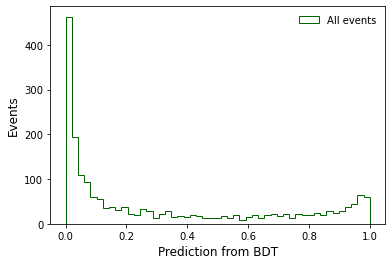

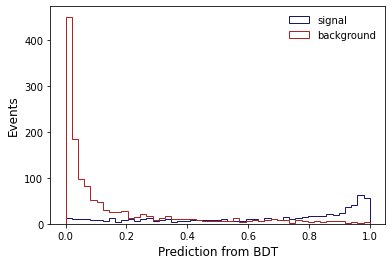

In [29]:
booster = xgb.train(param, train, num_boost_round=num_trees)

predictions = booster.predict(test)

# plot all predictions (both signal and background)
plt.hist(predictions, bins=np.linspace(0,1,50), histtype='step', color='darkgreen', label='All events')

plt.xlabel('Prediction from BDT', fontsize=12)
plt.ylabel('Events', fontsize=12)
plt.legend(frameon=False)
plt.show()

# plot signal and background separately
plt.hist(predictions[test.get_label().astype(bool)], bins=np.linspace(0,1,50),
         histtype='step', color='midnightblue', label='signal')
plt.hist(predictions[~(test.get_label().astype(bool))], bins=np.linspace(0,1,50),
         histtype='step', color='firebrick', label='background')

plt.xlabel('Prediction from BDT',fontsize=12)
plt.ylabel('Events',fontsize=12)
plt.legend(frameon=False)
plt.show()

Per ottenere la predizione, binaria, di nostro interesse dobbiamo andare a trasformare la predizione in un valore 0 o 1 che possa quindi essere messo in relazione con le categorie 'signal' e 'background' che stiamo cercando.

<module 'matplotlib.pyplot' from 'D:\\Anaconda\\envs\\env_fisica\\lib\\site-packages\\matplotlib\\pyplot.py'>

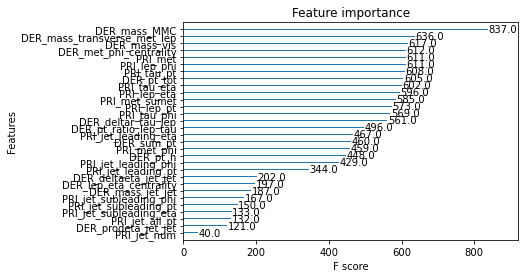

In [30]:
xgb.plot_importance(booster, grid=False);
plt

In [31]:
d = data_train.copy()

d['prediction'] = np.around(booster.predict(train)).astype('int64')
d['prediction'] = d['prediction'].map({1: 's', 0: 'b'})

d[['prediction', 'Label']]

,prediction,Label
7880,b,b
8597,b,b
6921,b,b
7617,b,b
750,b,b
...,...,...
1113,s,s
3374,s,s
6523,s,s
1768,b,b


In [32]:
right = d.loc[d['prediction'] == d['Label']]
wrong = d.loc[d['prediction'] != d['Label']]

true_positive = right.loc[right['prediction'] == 's']
false_positive = wrong.loc[wrong['prediction'] == 's']
false_negative = wrong.loc[wrong['prediction'] == 'b']

print("We had %d elements in our recordset." % len(d))
print("We classified correctly %d events." % len(right))
print("We classified wrongly %d events." % len(wrong))
print("We had %d false positive and %d false negative." % (len(false_positive), len(false_negative)))

print("")

print("Our precision has been %1.2f." % (len(true_positive)/(len(true_positive) + len(false_positive))))
print("Our recall has been %1.2f." % (len(true_positive)/(len(true_positive) + len(false_negative))))

We had 8000 elements in our recordset.
We classified correctly 7965 events.
We classified wrongly 35 events.
We had 11 false positive and 24 false negative.

Our precision has been 1.00.
Our recall has been 0.99.


<a id='section1-5'></a>
## Random forest

Random Forest è una raccolta di alberi decisionali che, una volta addestrati producono una classificazione più precisa.

Se non vengono potati con cura, gli alberi decisionali impareranno a conoscere modelli irregolari e valori anomali in profondità. Lo fanno così bene che regolano rapidamente il set di allenamento, con conseguente grande richiamo dei dati di allenamento ... ma scarse capacità predittive.
Questo è esattamente il problema che le foreste casuali mirano a risolvere.

Un singolo albero decisionale, responsabile dell'apprendimento di una serie di dati, potrebbe non essere in grado di funzionare correttamente a causa dei valori anomali e dell'ampiezza e complessità dei dati.
Quindi, invece di fare affidamento su un singolo albero, Random Forests si affida a una foresta di alberi decisionali coltivati "in modo intelligente". Ogni albero nella foresta può diventare altamente specializzato in un'area specifica, pur mantenendo una conoscenza generale nella maggior parte delle aree.
Quando un classificatore di foresta casuale, è in realtà ogni albero nella foresta che lavora insieme per votare sull'etichetta che pensano che un campione specifico dovrebbe essere assegnato.

Le foreste casuali utilizzano due tecniche durante l'allenamento: una a livello della foresta, l'altra a livello del singolo albero.

In [33]:
from sklearn.ensemble import RandomForestClassifier

def create_model(x_train, y_train):
    model = RandomForestClassifier(n_estimators=30, max_depth=10, oob_score=True, random_state=0)
    model.fit(x_train, y_train)
    
    return model

In [34]:
feature_names = data.columns[1:-2]  # we skip the first and last two columns because they are the ID, weight, and label

x_train, x_test, y_train, y_test = train_test_split(data[feature_names], data['Label'], test_size=0.3)
model = create_model(x_train, y_train)

d = x_train.copy()
d['Label'] = y_train

d['prediction'] = model.predict(x_train)

d[['prediction', 'Label']]

,prediction,Label
8940,s,s
8224,b,b
377,s,s
7640,b,b
4132,b,s
...,...,...
7632,b,b
3289,b,b
2624,b,b
3028,b,s


In [35]:
right = d.loc[d['prediction'] == d['Label']]
wrong = d.loc[d['prediction'] != d['Label']]

true_positive = right.loc[right['prediction'] == 's']
false_positive = wrong.loc[wrong['prediction'] == 's']
false_negative = wrong.loc[wrong['prediction'] == 'b']

print("We had %d elements in our recordset." % len(d))
print("We classified correctly %d events." % len(right))
print("We classified wrongly %d events." % len(wrong))
print("We had %d false positive and %d false negative." % (len(false_positive), len(false_negative)))

print("")

print("Our precision has been %1.2f." % (len(true_positive)/(len(true_positive) + len(false_positive))))
print("Our recall has been %1.2f." % (len(true_positive)/(len(true_positive) + len(false_negative))))

We had 7000 elements in our recordset.
We classified correctly 6370 events.
We classified wrongly 630 events.
We had 213 false positive and 417 false negative.

Our precision has been 0.90.
Our recall has been 0.82.


<a id='section2'></a>
## Classificazione

La classificazione è, insieme alla regressione, uno dei due problemi principali dell'apprendimento supervisionato, la branca del machine learning che si occupa di insegnare ai computer come risolvere determinati problemi mostrandogli esempi di come questi sono già stati risolti in passato. 

Matematicamente il problema dell'apprendimento supervisionato può essere a ridotto a: ho una o più variabil indipendenti x e una variabile dipendente y, devo trovare una funzione f tale che f(x) sia uguale a y. Niente di più, niente di meno. 

In gergo tecnico l'insieme delle varibili indipendenti x vengono chiamate features e la varibile y viene chiamata target. 
La differenza principale tra regressione e classificazione è:

- In un problema di regressione la variabile y è continua (cioè un numero).
- In un problema di classificazione la variabile y è categoria, ovvero un insieme finito di valori, i cosidetti labels, che solitamente rappresentano l'appartenenza ad una classe. 
- Alcuni problemi che possono essere affrontati con un modello di classificazione sono ad esempio:

Riconoscere oggetti nelle foto.
- Effettuare diagnosi cliniche.
- Comprendere lo stato d'animo di una persona da un tweet.

Per un semplice problema di classificazione con due features e due classi, il problema può essere rappresentato geometricamente come trovare l'equazione della retta che meglio riesce a dividere le due classi.

<img src="img/classificazione.png" width="50%">

Quando le classi da predire sono solo due si parla di classificazione binaria, in questi casi il modello non fa altro che rispondere con un si o con un no

E' un gatto nella foto ? SI/NO
Ha il paziente la varicella ? SI/NO
La persona che ha scritto questo tweet è incazzata ? SI/NO


In questo articolo proveremo a eseguire una classificazione binaria per classificare tumori al seno come benigni o maligni, basandoci su alcune proprietà estratte da immagini digitalizzate. A questo scopo utilizzeremo il [Wisconsis Breast Cancer Dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

<a id='section3'></a>
### Lavoriamo con Python

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

Utilizzando Pandas importiamo il dataset direttamente dalla repo all'interno di un DataFrame, una speciale struttura dati che permette di immagazzinare dati in maniera tabulare. 
Purtroppo ci tocca definire manualmente i nomi di tutte le colonne.

In [37]:
breast_cancer = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                           names=["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"])

breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Tramite il metodo info del DataFrame possiamo visualizzare diverse informazioni sulle varie colonne.

In [38]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Il dataset contiene 32 colonne, 1 di queste, diagnosis, è il nostro target, mentre le altre sono potenziali features, tranne id, di questo non ce ne facciamo nulla.
Osserva bene che il tipo di diagnosis è object, mentre tutte le altre colonne contengono numeri.

In [39]:
classes = breast_cancer["diagnosis"].unique()
classes

array(['M', 'B'], dtype=object)

Utilizzando il metodo unique possiamo osservare gli elementi unici contenuti in diagnosis, come puoi vedere questa è composta da due valori, M e B, che sono dei label indicanti rispettivamente un tumore maligno e uno benigno.

<a id='section4'></a>
### Classificazione con due features

Siccome il nostro obiettivo è sviluppare un modello semplice, selezioniamo solo due colonne e promuoviamole a features del nostro modello, optiamo per le seguenti:

- radius_se: l'errore standard del raggio del tumore
- concave points_worst: il numero peggiore di punti di concavità nel contorno del tumore.

Adesso creiamo due array numpy, uno contenente le features e l'altro il target.

In [40]:
X = breast_cancer[['radius_se', 'concave points_worst']].values
Y = breast_cancer['diagnosis'].values

Per poter valutare la qualità del nostro modello dobbiamo suddividere il nostro dataset in 2 set differenti:

- un train set: che ci servirà per addestrare il modello.
- un test set: che ci servirà per testarlo.

Questa suddivisione è necessaria per verificare che il modello abbia effettivamente imparato qualcosa e che sia in grado di generalizzare su dati non visti durante l'addestramento.

Possiamo eseguire la suddivisione utilizzando la funzione train_test_split, assegnando il 70% dei dati al train set e il 30% al test set.

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

Ricorderai che la colonna diagnosis contiene dei caratteri, ma a noi servono dei numeri !
Una tecnica da adoperare in questi casi è codificare gli oggetti sotto forma di numeri, nel nostro caso la codifica che andremo a fare è la seguente:

- M => Classe positiva = 1
- B => Classe negativa = 0

Per farlo possiamo utilizzare la classe LabelEncoder. LabelEncoder appartiene alla categoria dei trasformatori di scikit-learn, che si occupano di eseguire trasformazioni i dati. Un trasformatore viene inizializzato con il metodo fit, che si occupa di effettuare tutti i calcoli necessari per poi poter eseguire la trasformazione utilizzando il metodo transform.

In [42]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)
np.unique(Y_test)

array([0, 1])

Come vedi i caratteri sono stati codificati in numeri, la funzione unique usata qui è l'equivalente di numpy del metodo unique del DataFrame che abbiamo usato prima.

La classe fit_transform è una scorciatoia che equivale a chiamare prima fit e poi transform sui dati passati come parametro. 

Prima di costruire un modello bisogna essere sicuri che i dati siano sulla stessa scala, altrimenti si rischia che questo attribuisca maggiore importanza alle features con magnitudine maggiore. 
Riprendiamo un momento il nostro DataFrame, selezioniamo solo le nostre due features e utilizziamo il metodo describe per ottenere le informazioni statistiche (in alternativa avremmo potuto utilizzare le funzioni np.min e np.max sui nostri array numpy).

In [43]:
breast_cancer[["radius_se", "concave points_worst"]].describe()

,radius_se,concave points_worst
count,569.000000,569.000000
mean,0.405172,0.114606
std,0.277313,0.065732
min,0.111500,0.000000
25%,0.232400,0.064930
50%,0.324200,0.099930
75%,0.478900,0.161400
max,2.873000,0.291000


Osservando i valori minimi e massimi delle due colonne puoi vedere che la colonna radius_se si trova in un range di valore 10 volte superiore rispetto a concave points_worst.
Per portare le features su di una scala comune abbiamo due possibilità:

- Normalizzare: portare tutti i dati in un range compreso tra 0 e 1.
- Standardizzare: creare una distribuzione normale, cioè con media 0 e deviazione standard 1.

Optiamo per la standardizzazione, possiamo eseguirla utilizzando la classe trasformatore StandardScaler di scikit-learn.

In [44]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

Adesso siamo pronti per creare il nostro modello di classificazione, il modello che implementeremo è la regressione logistica, che oltre alla classe di appartenenza ritorna anche la probabilità di quanto la classificazione sia corretta.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, Y_train)

LogisticRegression()

Abbiamo il nostro modello! E ora?
Adesso dobbiamo valutare quanto effettivamente sia buono, per farlo possiamo utilizzare il test set e due metriche:

- **Accuracy**: semplicemente conta quante delle classificazioni fatte dal modello sono corrette, ritorna un valore tra 0 e 1, maggiore è meglio
- **Negative Log-likelihood (log loss)**: tiene conto della probabilità, ritorna un valore tra 0 ed 1, minore è meglio

Entrambe le funzioni sono implementate in scikit-learn

In [46]:
Y_pred = lr.predict(X_train)
Y_pred_t = lr.predict(X_test)
Y_pred_proba = lr.predict_proba(X_train)
Y_pred_proba_t = lr.predict_proba(X_test)

print("Train Accuracy: " + str(accuracy_score(Y_train, Y_pred)))
print("Train Log Loss: " + str(log_loss(Y_train, Y_pred_proba)))

print("Test Accuracy: " + str(accuracy_score(Y_test, Y_pred_t)))
print("Test Log Loss: " + str(log_loss(Y_test, Y_pred_proba_t)))

Train Accuracy: 0.9246231155778895
Train Log Loss: 0.18483906386939583
Test Accuracy: 0.9532163742690059
Test Log Loss: 0.155040306723859


Un altro modo per valutare la bontà dell'algoritmo di classificazione, paragonabile all'accuracy, è quello di calcolare la cosiddetta confusion matrix:

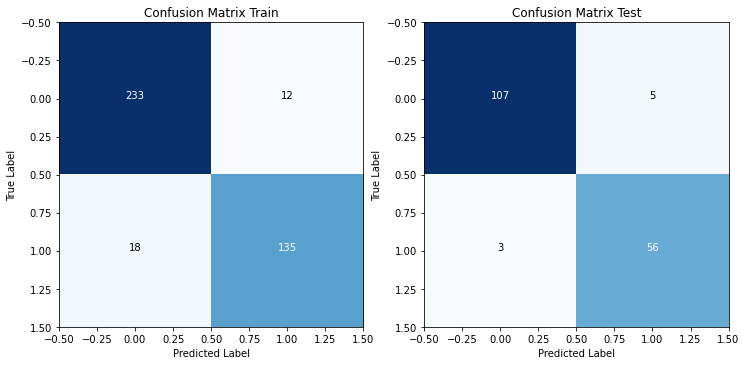

In [47]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

cf = confusion_matrix(Y_train, Y_pred)
ax1.imshow(cf, cmap=plt.cm.Blues)
ax1.set_title("Confusion Matrix Train")
ax1.set_ylabel("True Label")
ax1.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax1.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

cf = confusion_matrix(Y_test, Y_pred_t)
ax2.imshow(cf, cmap=plt.cm.Blues)
ax2.set_title("Confusion Matrix Test")
ax2.set_ylabel("True Label")
ax2.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax2.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

plt.show()

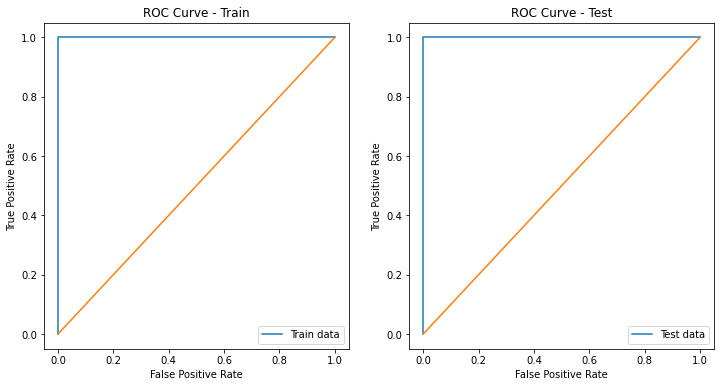

In [48]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import itertools

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
fpr, tpr, _ = roc_curve(Y_pred, Y_pred_proba[:,1])
roc_auc = auc(fpr, tpr)

ax1.plot(fpr, tpr, label="Train data")
ax1.plot([0, 1], [0, 1])
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.set_title("ROC Curve - Train")
ax1.legend(loc="lower right")

fpr, tpr, _ = roc_curve(Y_pred_t, Y_pred_proba_t[:,1])
roc_auc = auc(fpr, tpr)

ax2.plot(fpr, tpr, label="Test data")
ax2.plot([0, 1], [0, 1])
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
ax2.set_title("ROC Curve - Test")
ax2.legend(loc="lower right")

plt.show()

Analizziamo i risultati della classificaizone ritornando i dati nel dataset originario:

In [49]:
X_all = breast_cancer[['radius_se', 'concave points_worst']].values
X_all = ss.transform(X_all)
Y_all = breast_cancer['diagnosis'].values

prev_value = lr.predict(X_all)
prev_value = le.inverse_transform(prev_value)

breast_cancer['prediction'] = prev_value

Visualizziamo prima i falsi positivi:

In [50]:
breast_cancer.loc[(breast_cancer['diagnosis'] != breast_cancer['prediction']) & (breast_cancer['diagnosis'] == 'B')]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,prediction
68,859471,B,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,...,22.65,65.50,324.7,0.14820,0.4365,1.2520,0.1750,0.4228,0.11750,M
81,8611161,B,13.340,15.86,86.49,520.0,0.10780,0.15350,0.11690,0.06987,...,23.19,96.66,614.9,0.15360,0.4791,0.4858,0.1708,0.3527,0.10160,M
89,861598,B,14.640,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.07064,...,18.24,109.40,803.6,0.12770,0.3089,0.2604,0.1397,0.3151,0.08473,M
112,86409,B,14.260,19.65,97.83,629.9,0.07837,0.22330,0.30030,0.07798,...,23.73,107.00,709.0,0.08949,0.4193,0.6783,0.1505,0.2398,0.10820,M
128,866458,B,15.100,16.39,99.58,674.5,0.11500,0.18070,0.11380,0.08534,...,18.33,105.90,762.6,0.13860,0.2883,0.1960,0.1423,0.2590,0.07779,M
148,86973702,B,14.440,15.18,93.97,640.1,0.09970,0.10210,0.08487,0.05532,...,19.85,108.60,766.9,0.13160,0.2735,0.3103,0.1599,0.2691,0.07683,M
152,8710441,B,9.731,15.34,63.78,300.2,0.10720,0.15990,0.41080,0.07857,...,19.49,71.04,380.5,0.12920,0.2772,0.8216,0.1571,0.3108,0.12590,M
225,88143502,B,14.340,13.47,92.51,641.2,0.09906,0.07624,0.05724,0.04603,...,16.90,110.40,873.2,0.12970,0.1525,0.1632,0.1087,0.3062,0.06072,M
247,884626,B,12.890,14.11,84.95,512.2,0.08760,0.13460,0.13740,0.03980,...,17.70,105.00,639.1,0.12540,0.5849,0.7727,0.1561,0.2639,0.11780,M
290,89143602,B,14.410,19.73,96.03,651.0,0.08757,0.16760,0.13620,0.06602,...,22.13,101.70,767.3,0.09983,0.2472,0.2220,0.1021,0.2272,0.08799,M


E poi i falsi negativi:

In [51]:
breast_cancer.loc[(breast_cancer['diagnosis'] != breast_cancer['prediction']) & (breast_cancer['diagnosis'] == 'M')]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,prediction
10,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,...,33.88,123.80,1150.0,0.11810,0.15510,0.1459,0.09975,0.2948,0.08452,B
13,846381,M,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,...,27.66,112.00,876.5,0.11310,0.19240,0.2322,0.11190,0.2809,0.06287,B
40,855167,M,13.44,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,...,30.25,102.50,787.9,0.10940,0.20430,0.2085,0.11120,0.2994,0.07146,B
41,855563,M,10.95,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,...,35.34,87.22,514.0,0.19090,0.26980,0.4023,0.14240,0.2964,0.09606,B
73,859983,M,13.80,15.79,90.43,584.1,0.10070,0.12800,0.07789,0.05069,...,20.86,110.30,812.4,0.14110,0.35420,0.2779,0.13830,0.2589,0.10300,B
86,86135501,M,14.48,21.46,94.25,648.2,0.09444,0.09947,0.12040,0.04938,...,29.25,108.40,808.9,0.13060,0.19760,0.3349,0.12250,0.3020,0.06846,B
126,866083,M,13.61,24.69,87.76,572.6,0.09258,0.07862,0.05285,0.03085,...,35.64,113.20,848.7,0.14710,0.28840,0.3796,0.13290,0.3470,0.07900,B
135,868202,M,12.77,22.47,81.72,506.3,0.09055,0.05761,0.04711,0.02704,...,33.37,92.04,653.6,0.14190,0.15230,0.2177,0.09331,0.2829,0.08067,B
171,87163,M,13.43,19.63,85.84,565.4,0.09048,0.06288,0.05858,0.03438,...,29.87,116.60,993.6,0.14010,0.15460,0.2644,0.11600,0.2884,0.07371,B
184,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,28.03,113.80,973.1,0.13010,0.32990,0.3630,0.12260,0.3175,0.09772,B


Trattandosi di un modello estremamente semplice, con sole due features, i risultati non sono malvagi. 
Visualizziamo cosa il modello ha imparato all'interno di un grafico.

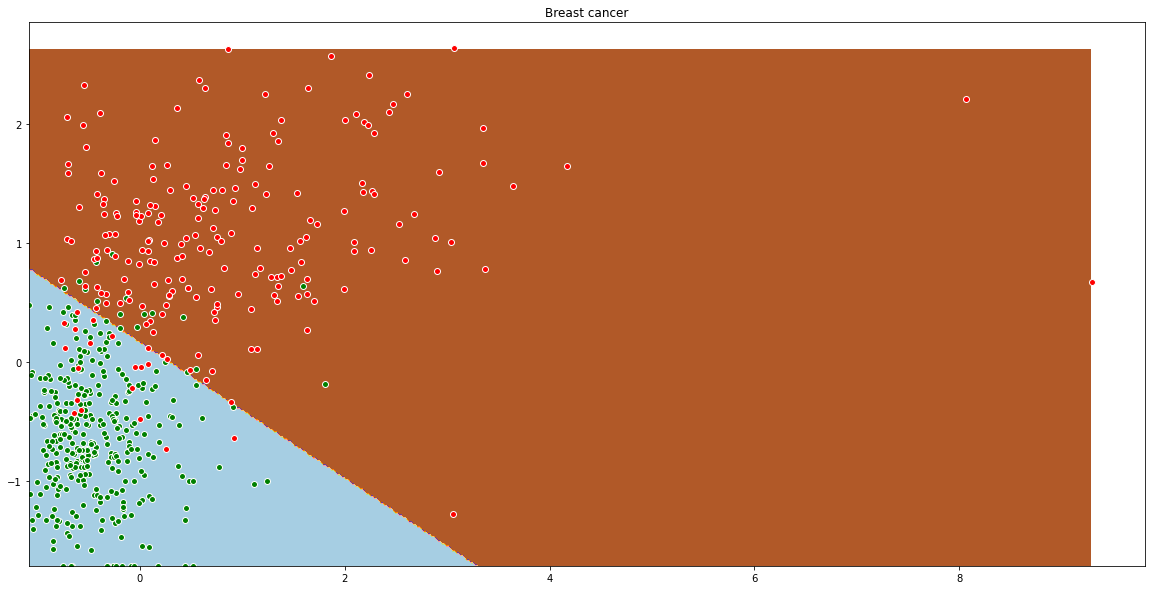

In [52]:
def showBounds(X, Y, model, title=None):
    plt.figure(figsize=(20,10))
    
    h = .02 
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    X_m = X[Y==1]
    X_b = X[Y==0]
    
    plt.title(title)
    plt.scatter(X_b[:, 0], X_b[:, 1], c='green',  edgecolor='white')
    plt.scatter(X_m[:, 0], X_m[:, 1], c='red',  edgecolor='white')
    plt.show()
    
    
X = breast_cancer[['radius_se', 'concave points_worst']].values
X = ss.transform(X)
Y = breast_cancer['diagnosis']
Y = le.transform(Y)
showBounds(X, Y, lr, title='Breast cancer')

La funzione showBounds è abbastanza complessa e spiegarla riga per riga porterebbe via troppo tempo, in sostanza quello che fa è:

- Creare uno scatterplot con gli esempi corrispondenti a tumori maligni (in rosso)
- Creare uno scatterplot con gli esempi corrispondenti a tumori benigni (in verde)
- Eseguire una predizione per ogni punto del grafico, ricorda che l'asse delle x corrisponde alla feature radius_se, mentre quella delle y alla feature concave points_worst, se il punto viene classificato come maligno allora lo colora di marroncino, se invece viene classificato come benigno lo colora di azzurro, il confine che separa i due colori è il decision boundary.

### Classificazione con SVM

Proviamo ora a classificare glis tessi dati, utilizzando una Support Vector Machine con le librerie di scikitlearn:

In [53]:
from sklearn import svm
clf = svm.SVC(probability=True)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_train)
Y_pred_t = clf.predict(X_test)
Y_pred_proba = clf.predict_proba(X_train)
Y_pred_proba_t = clf.predict_proba(X_test)

print("Train Accuracy: " + str(accuracy_score(Y_train, Y_pred)))
print("Train Log Loss: " + str(log_loss(Y_train, Y_pred_proba)))

print("Test Accuracy: " + str(accuracy_score(Y_test, Y_pred_t)))
print("Test Log Loss: " + str(log_loss(Y_test, Y_pred_proba_t)))

Train Accuracy: 0.9321608040201005
Train Log Loss: 0.18800039040579242
Test Accuracy: 0.9298245614035088
Test Log Loss: 0.17962651796514043


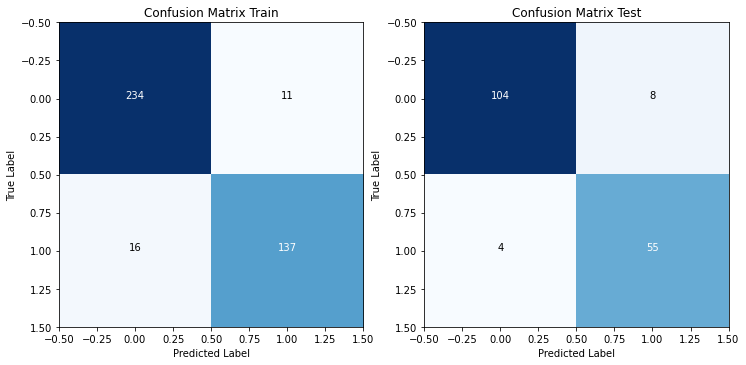

In [54]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

cf = confusion_matrix(Y_train, Y_pred)
ax1.imshow(cf, cmap=plt.cm.Blues)
ax1.set_title("Confusion Matrix Train")
ax1.set_ylabel("True Label")
ax1.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax1.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

cf = confusion_matrix(Y_test, Y_pred_t)
ax2.imshow(cf, cmap=plt.cm.Blues)
ax2.set_title("Confusion Matrix Test")
ax2.set_ylabel("True Label")
ax2.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax2.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

plt.show()

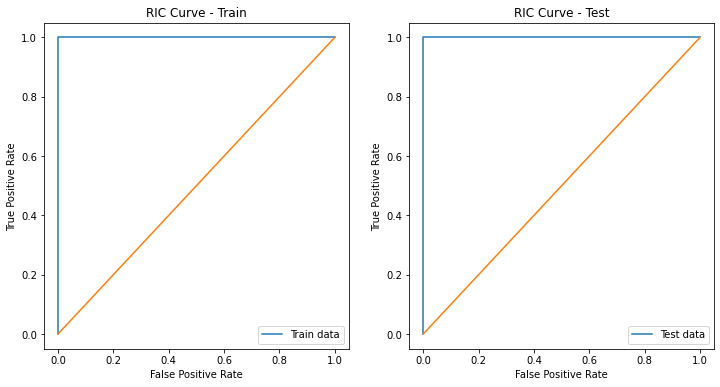

In [55]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import itertools

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
fpr, tpr, _ = roc_curve(Y_pred, Y_pred_proba[:,1])
roc_auc = auc(fpr, tpr)

ax1.plot(fpr, tpr, label="Train data")
ax1.plot([0, 1], [0, 1])
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.set_title("RIC Curve - Train")
ax1.legend(loc="lower right")

fpr, tpr, _ = roc_curve(Y_pred_t, Y_pred_proba_t[:,1])
roc_auc = auc(fpr, tpr)

ax2.plot(fpr, tpr, label="Test data")
ax2.plot([0, 1], [0, 1])
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
ax2.set_title("RIC Curve - Test")
ax2.legend(loc="lower right")

plt.show()

<a id='section5'></a>
### Classificazione con tutte le feature

Vediamo un po' cosa accade sfruttando tutte le colonne del dataset originale come features.

In [56]:
Y = breast_cancer['diagnosis']
X = breast_cancer.copy()
del X['diagnosis']
del X['prediction']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_train)
Y_pred_t = lr.predict(X_test)
Y_pred_proba = lr.predict_proba(X_train)
Y_pred_proba_t = lr.predict_proba(X_test)

print("Train Accuracy: " + str(accuracy_score(Y_train, Y_pred)))
print("Train Log Loss: " + str(log_loss(Y_train, Y_pred_proba)))

print("Test Accuracy: " + str(accuracy_score(Y_test, Y_pred_t)))
print("Test Log Loss: " + str(log_loss(Y_test, Y_pred_proba_t)))

Train Accuracy: 0.9874371859296482
Train Log Loss: 0.06503974548332693
Test Accuracy: 0.9883040935672515
Test Log Loss: 0.046927266145431586


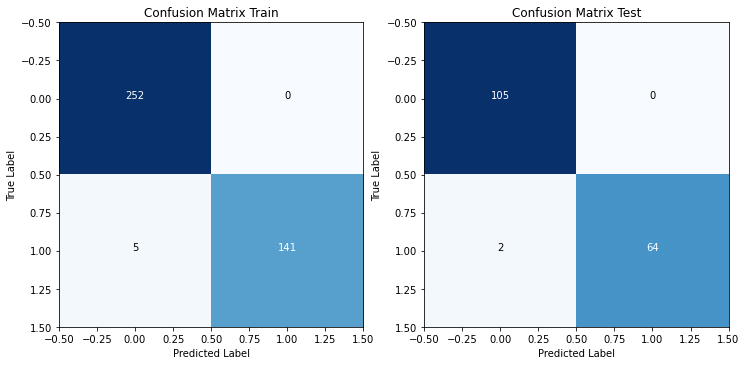

In [57]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

cf = confusion_matrix(Y_train, Y_pred)
ax1.imshow(cf, cmap=plt.cm.Blues)
ax1.set_title("Confusion Matrix Train")
ax1.set_ylabel("True Label")
ax1.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax1.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

cf = confusion_matrix(Y_test, Y_pred_t)
ax2.imshow(cf, cmap=plt.cm.Blues)
ax2.set_title("Confusion Matrix Test")
ax2.set_ylabel("True Label")
ax2.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax2.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

plt.show()

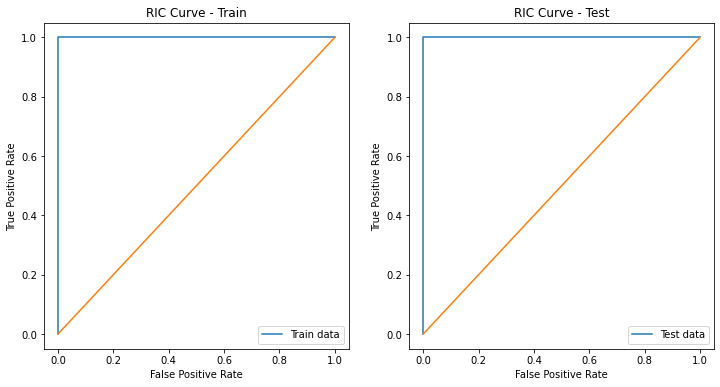

In [58]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import itertools

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
fpr, tpr, _ = roc_curve(Y_pred, Y_pred_proba[:,1])
roc_auc = auc(fpr, tpr)

ax1.plot(fpr, tpr, label="Train data")
ax1.plot([0, 1], [0, 1])
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.set_title("RIC Curve - Train")
ax1.legend(loc="lower right")

fpr, tpr, _ = roc_curve(Y_pred_t, Y_pred_proba_t[:,1])
roc_auc = auc(fpr, tpr)

ax2.plot(fpr, tpr, label="Test data")
ax2.plot([0, 1], [0, 1])
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
ax2.set_title("RIC Curve - Test")
ax2.legend(loc="lower right")

plt.show()

Avendo più informazioni a disposizione, il modello addestrato con tutte le features è notevolmente migliore, questo dimostra il ruolo fondamentale che hanno i dati nel machine learning.

Avendo più informazioni a disposizione, il modello addestrato con tutte le features è notevolmente migliore, questo dimostra il ruolo fondamentale che hanno i dati nel machine learning.

<a id='section6'></a>
### Un esempio fisico

Prendiamo i dati dal portale [CERN per gli Open Data](http://opendata.cern.ch/record/10001).

Questo set di dati è stato estratto dal repository di dati ufficiale di OPERA e contiene tutte le informazioni sui dati dell'emulsione per i dieci neutrini tau candidati, identificati dopo un'analisi approfondita che include i dati sia dei rivelatori elettronici che dei film di emulsione nucleare dopo la loro digitalizzazione con microscopi ottici completamente automatizzati. L'osservazione dell'aspetto del neutrino tau in un fascio di neutrini muonici era l'obiettivo principale dell'esperimento OPERA. Questo record di dati contiene in particolare le informazioni sui vertici di interazione dei neutrini comprese tutte le tracce di emulsione prodotte nelle interazioni osservate e nel decadimento. La localizzazione dell'interazione del neutrino e la misurazione delle traiettorie di tutte le particelle prodotte è la fase finale dell'analisi dell'evento, dopo l'identificazione dei mattoni di interazione del neutrino effettuata con i dati del rivelatore elettronico. Le tracce ricostruite includono adroni, frammenti nucleari che si muovono sia in avanti che all'indietro e coppie di elettroni, muoni e leptoni tau.

Per questo campione di dati del neutrino tau, la Collaborazione ha eseguito un'analisi dedicata, con una classificazione dettagliata di tutte le particelle prodotte all'interazione del neutrino. Infatti, in un'interazione del neutrino con i nucleoni del bersaglio di piombo, si producono diversi adroni: i cosiddetti adroni doccia e frammenti nucleari prodotti nella rottura e nell'evaporazione del nucleo bersaglio. Inoltre, a seconda del sapore del neutrino interagente, viene prodotto un leptone corrispondente. Dopo una lunghezza di volo di circa 1 mm, il leptone tau prodotto nell'interazione dei neutrini tau decade in uno dei seguenti canali: adrone singolo (49,5%), elettrone (17,8%), muone (17,7%) e tre adroni (15,0 %).

In [59]:
dataset = pd.read_csv("data/lines.csv")
dataset

,trType,posX1,posY1,posZ1,posX2,posY2,posZ2
0,8,112653.0,79333.3,24057.0,112640.0,79344.7,24196.4
1,2,112653.0,79333.3,24057.0,111168.0,78975.8,25883.7
2,2,111168.0,78975.8,25883.7,109962.0,78663.4,27396.4
3,2,109962.0,78663.4,27396.4,108911.0,78360.4,28694.1
4,2,108911.0,78360.4,28694.1,107877.0,78065.5,29980.8
...,...,...,...,...,...,...,...
1030,3,91743.2,40083.6,52238.9,91626.9,40196.8,53600.4
1031,3,91918.8,40006.3,49590.0,91830.4,40034.0,50890.0
1032,3,91830.4,40034.0,50890.0,91776.8,40081.3,52238.9
1033,3,91776.8,40081.3,52238.9,91813.2,40200.6,53600.4


In [60]:
exclude_classes = [1, 8]
df = dataset[(dataset['trType'] != 1) & (dataset['trType'] != 8)]

X = df[['posX1', 'posY1', 'posZ1', 'posX2', 'posY2', 'posZ2']].values
y = df['trType'].values.astype('int')

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='lbfgs', max_iter=100000)
lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_train)
Y_pred_t = lr.predict(X_test)
Y_pred_proba = lr.predict_proba(X_train)
Y_pred_proba_t = lr.predict_proba(X_test)

print("Train Accuracy: " + str(accuracy_score(Y_train, Y_pred)))
print("Train Log Loss: " + str(log_loss(Y_train, Y_pred_proba)))

print("Test Accuracy: " + str(accuracy_score(Y_test, Y_pred_t)))
print("Test Log Loss: " + str(log_loss(Y_test, Y_pred_proba_t)))

Train Accuracy: 0.6797202797202797
Train Log Loss: 0.5963965337058069
Test Accuracy: 0.7133550488599348
Test Log Loss: 0.5674864081086985


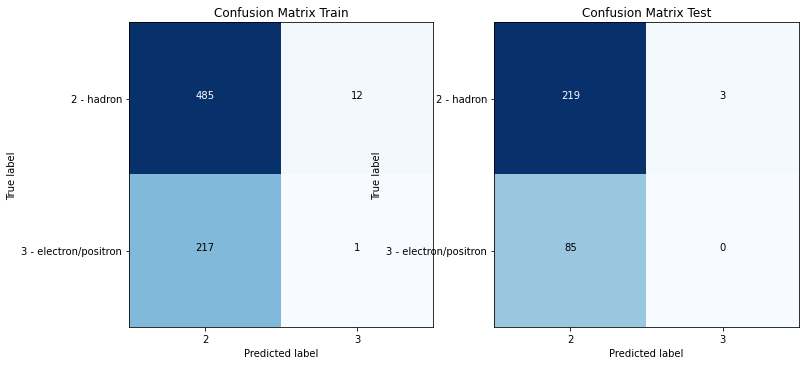

In [61]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

cf = confusion_matrix(Y_train, Y_pred)
ax1.imshow(cf, cmap=plt.cm.Blues)
ax1.set_title("Confusion Matrix Train")
ax1.set(xticks=np.arange(cf.shape[1]),
       yticks=np.arange(cf.shape[0]),
       xticklabels=['2', '3'],
       yticklabels=['2 - hadron', '3 - electron/positron'],
       ylabel='True label',
       xlabel='Predicted label')

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax1.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

cf = confusion_matrix(Y_test, Y_pred_t)
ax2.imshow(cf, cmap=plt.cm.Blues)
ax2.set_title("Confusion Matrix Test")
ax2.set(xticks=np.arange(cf.shape[1]),
       yticks=np.arange(cf.shape[0]),
       xticklabels=['2', '3'],
       yticklabels=['2 - hadron', '3 - electron/positron'],
       ylabel='True label',
       xlabel='Predicted label')

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax2.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

plt.show()

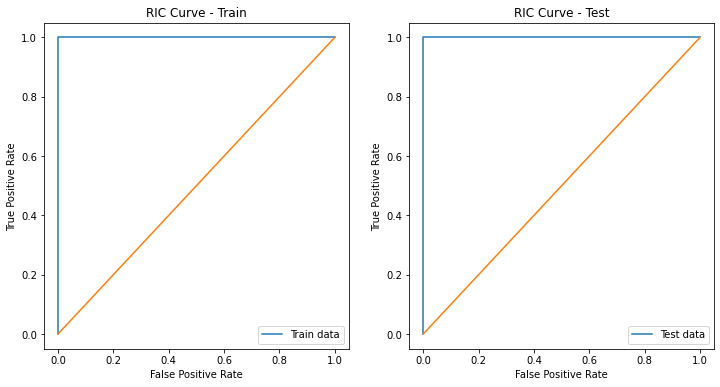

In [62]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import itertools

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
fpr, tpr, _ = roc_curve(Y_pred, Y_pred_proba[:,1], pos_label=3)
roc_auc = auc(fpr, tpr)

ax1.plot(fpr, tpr, label="Train data")
ax1.plot([0, 1], [0, 1])
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.set_title("RIC Curve - Train")
ax1.legend(loc="lower right")

fpr, tpr, _ = roc_curve(Y_pred_t, Y_pred_proba_t[:,1], pos_label=3)
roc_auc = auc(fpr, tpr)

ax2.plot(fpr, tpr, label="Test data")
ax2.plot([0, 1], [0, 1])
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
ax2.set_title("RIC Curve - Test")
ax2.legend(loc="lower right")

plt.show()

In [63]:
values = ss.transform(dataset[['posX1', 'posY1', 'posZ1', 'posX2', 'posY2', 'posZ2']].values)
predicts = lr.predict(values)

dataset['prediction'] = predicts

good = len(dataset[dataset['trType'] == dataset['prediction']])
wrong = len(dataset[dataset['trType'] != dataset['prediction']])

print(f'Events predicted correctly = {good}.')
print(f'Events predicted wrongly = {wrong}.')

print(f'Percent of right classifications = {good / (good+wrong)}.')

Events predicted correctly = 705.
Events predicted wrongly = 330.
Percent of right classifications = 0.6811594202898551.


Usiamo una SVM per classificare lo stesso dataset:

In [64]:
from sklearn import svm
clf = svm.SVC(probability=True)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_train)
Y_pred_t = clf.predict(X_test)
Y_pred_proba = clf.predict_proba(X_train)
Y_pred_proba_t = clf.predict_proba(X_test)

print("Train Accuracy: " + str(accuracy_score(Y_train, Y_pred)))
print("Train Log Loss: " + str(log_loss(Y_train, Y_pred_proba)))

print("Test Accuracy: " + str(accuracy_score(Y_test, Y_pred_t)))
print("Test Log Loss: " + str(log_loss(Y_test, Y_pred_proba_t)))

Train Accuracy: 0.8223776223776224
Train Log Loss: 0.3870805787168517
Test Accuracy: 0.8208469055374593
Test Log Loss: 0.43977891840427846


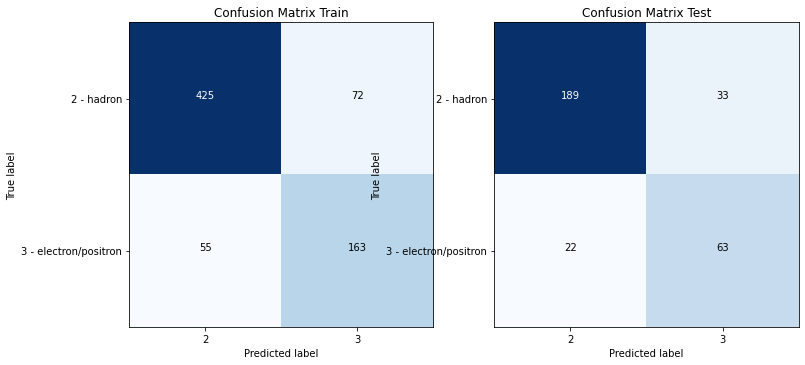

In [65]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

cf = confusion_matrix(Y_train, Y_pred)
ax1.imshow(cf, cmap=plt.cm.Blues)
ax1.set_title("Confusion Matrix Train")
ax1.set(xticks=np.arange(cf.shape[1]),
       yticks=np.arange(cf.shape[0]),
       xticklabels=['2', '3'],
       yticklabels=['2 - hadron', '3 - electron/positron'],
       ylabel='True label',
       xlabel='Predicted label')

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax1.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

cf = confusion_matrix(Y_test, Y_pred_t)
ax2.imshow(cf, cmap=plt.cm.Blues)
ax2.set_title("Confusion Matrix Test")
ax2.set(xticks=np.arange(cf.shape[1]),
       yticks=np.arange(cf.shape[0]),
       xticklabels=['2', '3'],
       yticklabels=['2 - hadron', '3 - electron/positron'],
       ylabel='True label',
       xlabel='Predicted label')

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax2.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

plt.show()

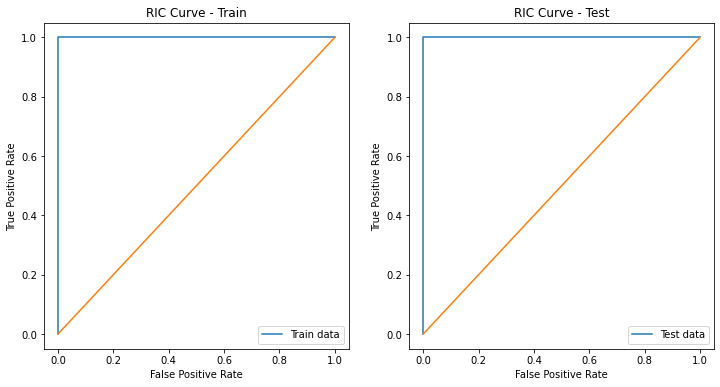

In [66]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import itertools

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
fpr, tpr, _ = roc_curve(Y_pred, Y_pred_proba[:,1], pos_label=3)
roc_auc = auc(fpr, tpr)

ax1.plot(fpr, tpr, label="Train data")
ax1.plot([0, 1], [0, 1])
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.set_title("RIC Curve - Train")
ax1.legend(loc="lower right")

fpr, tpr, _ = roc_curve(Y_pred_t, Y_pred_proba_t[:,1], pos_label=3)
roc_auc = auc(fpr, tpr)

ax2.plot(fpr, tpr, label="Test data")
ax2.plot([0, 1], [0, 1])
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
ax2.set_title("RIC Curve - Test")
ax2.legend(loc="lower right")

plt.show()

La classificazione con SVM è leggermente migliore rispetto a quella fatta con un linear classifier. Tuttavia i nostri modelli non sembrano riuscire a classificare correttamente gli eventi di tipo 2, visto che evidentemente abbiamo un elevato numero di eventi misclassificati.

[Clicca qui per tornare all'inizio della pagina](#start)<a id='start'></a>

In [ ]:
# con più classi ha senso anche plottare più ROC